## Trip Adviser Mondrian Review 크롤링과 리뷰 분석 
- 호텔의 더 나은 서비스를 위한 리뷰 분석
- 리뷰 평점 5점 만점 중 3점 이하 리뷰를 크롤링
- 리뷰 크롤링한 txt 파일을 워드클라우드로 표현 

### 1. 크롤링 

#### 1-1. 크롤링을 위한 패키지 불러오기 
- 크롤링을 위해 selenium을 사용할 예정 

In [38]:
# 패키지 불러오기 
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
import time 
import re 
import json
from selenium.webdriver.common.keys import Keys
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import requests
from pandas import json_normalize

#### 1-2. 셀레니움 크롤링 

In [39]:
# 지정한 url로 크롭드라이버 실행
url = "https://www.tripadvisor.co.kr/Hotel_Review-g294197-d20886229-Reviews-Mondrian_Seoul_Itaewon-Seoul.html"
driver = webdriver.Chrome()
driver.get(url)

In [40]:
# 키보드 액션 (켰을 때 나오는 날짜 설정 창 esc키로 끄는 설정)
webdriver.ActionChains(driver).send_keys(Keys.ESCAPE).perform()

In [41]:
# 3점 이하 리뷰를 보기위한 버튼 설정 

In [42]:
# 평점 3점 체크
normal_button = driver.find_element_by_xpath('//*[@id="component_14"]/div/div[3]/div[1]/div[1]/div[1]/ul/li[3]/label')
# normal_button.click()

In [43]:
# 평점 2점 체크
bad_button = driver.find_element_by_xpath('//*[@id="component_14"]/div/div[3]/div[1]/div[1]/div[1]/ul/li[4]/label')
# bad_button.click()

In [44]:
# 평점 1점 체크 
worst_button = driver.find_element_by_xpath('//*[@id="component_14"]/div/div[3]/div[1]/div[1]/div[1]/ul/li[5]/label')
# worst_button

In [45]:
# 버튼 클릭 동작 
try:
    normal_button.click()
except:
    pass
try:
    bad_button.click()
except:
    pass
try:
    worst_button.click()
except:
    pass

In [46]:
# 리뷰 수 확인 
review = driver.find_elements_by_xpath('//*[@id="component_14"]/div/div[3]/div/div/div[3]/div[1]/div[1]/q/span')
len(review)

4

#### 1-3. 크롤링 한 리뷰 확인 후 txt 파일로 저장 

In [9]:
# 리뷰 담기 

In [10]:
# 모든 리뷰 내용 담아내기
reviews = []
for i in range(0,len(review)):
    reviews.append(review[i].text)

In [11]:
# 결과 확인 
reviews

['전화예약만 가능해서 전화예약하고 갔어요, 마치 전화예약안하고 당일에 오면 안될거처럼하고 만석이라고 하셨는데...텅텅 비어있어서 (4시간동안 있었는데) 놀랐구요, 그냥 오신분들도 이용하시더라구여?ㅋㅋㅋㅋㅋ그리고 우선 반갑게 맞이해주는 느낌 전혀 1도없었구요 다들 약간...그냥 기운이 없어보이고 불친절까진 아닌데 저조차도 같이 기운이 빠지는 느낌이랄까요.....이뻐서 먹긴먹었지만 서비스만족은 0입니당',
 '룸 전체 층고가 낮아 조금 답답한 느낌이 있었습니다. 샤워부스 하수 물이 제대로 빠지지 않아 룸으로 넘치는 경우가 생겨 침대 밑에 물을 닦아야 하였고 룸 전체가 습기가 차고 불편했습니다. 이외에 기타 룸서비스 관련 호텔 직원분들은 너무 친절하시고 좋았습니다.',
 '입구쪽 직원들은 교육이 덜된 것인지? 차량 접근 시 대응이 많이 미숙합니다. 그러나 전반적으로 프론트 및 서비스 직원들의 대응 및 피드백은 빠르고 정확하며 배려 있습니다. 객실은 전반적으로 동급 유사 호텔들에 비해 평수가 작게 나온편이며 카펫이 아닌 나무 바닥에 러그를 활용한 구조입니다. 신규 호텔이다보니 새집 냄새가 객실에서 많이 나는편이며 객실 복도 바닥 카페트에는 먼지더미(???)가 종종 눈에 보입니다. 전반적으로 신규 시설들에 비해 브랜드 급에 맞는 운영은 여러면에서 아직 보완이 많이 필요해보입니다.',
 '8.8일 1730호에 투숙하였습니다. 신축 호텔이라 큰 기대를 가지고 방문 하였는데 밤새 옆방에서 켜둔 EDM 음악의 진동에 잠을 들지 못해 프론트 데스크를 호출하였으나 방문을 열지 않고 음악은 몇시간째 계속되어서 도저히 참지 못하고 새벽에 차라리 우리 방을 옮겨달라 했으나 만실이라 그것도 불가능하다 하였음 밤새 음악 소리에 시달리다 아침에 옆방이 비고 문이 열려있는걸 보니 밤새 파티를 했나 봅니다 정말 끔찍한 밤이었고 다음날 아침 수영장에 다녀온 후 방에 들어가려고 하니 방키가 방문이 열리지 않아서 젖은 수영복을 입고 발만 구르다가 같은 층에 다른 방 청소를 하고 있는 직원분께 요청

In [12]:
# 워드 클라우드를 만들어 내기 위해 txt로 저장 
with open('ad_mondrian.txt', 'w') as f:
    for line in reviews:
        f.write(line)

In [13]:
!ls

01_naver.ipynb                        ad_andaz.txt
02_instagram_selenium.ipynb           ad_mondrian.txt
03_yanoja.ipynb                       datas
04_trip_adviser_nondrian_review.ipynb tripadviser_andaz.py
05_trip_adviser_andaz_review.ipynb    tripadviser_mondrian.py


In [47]:
# 크롬 드라이버 종료 
driver.quit()

### 2. 워드클라우드 만들어보기

#### 2-1. 패키지 불러오기 

In [1]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import font_manager, rc
import sys

In [3]:
# 한글문장 테스트
import nltk
import konlpy
from konlpy.tag import Kkma
kkma = Kkma()

In [4]:
kkma.sentences("한국어 재미있어요")

['한국어 재미있어요']

#### 2-2. 텍스트 파일 불러오고 빈도수 확인하기 

In [7]:
# 텍스트 파일 불러오기 
f = open("datas/ad_mondrian.txt", "r")
line = f.read()
line

'전화예약만 가능해서 전화예약하고 갔어요, 마치 전화예약안하고 당일에 오면 안될거처럼하고 만석이라고 하셨는데...텅텅 비어있어서 (4시간동안 있었는데) 놀랐구요, 그냥 오신분들도 이용하시더라구여?ㅋㅋㅋㅋㅋ그리고 우선 반갑게 맞이해주는 느낌 전혀 1도없었구요 다들 약간...그냥 기운이 없어보이고 불친절까진 아닌데 저조차도 같이 기운이 빠지는 느낌이랄까요.....이뻐서 먹긴먹었지만 서비스만족은 0입니당룸 전체 층고가 낮아 조금 답답한 느낌이 있었습니다. 샤워부스 하수 물이 제대로 빠지지 않아 룸으로 넘치는 경우가 생겨 침대 밑에 물을 닦아야 하였고 룸 전체가 습기가 차고 불편했습니다. 이외에 기타 룸서비스 관련 호텔 직원분들은 너무 친절하시고 좋았습니다.입구쪽 직원들은 교육이 덜된 것인지? 차량 접근 시 대응이 많이 미숙합니다. 그러나 전반적으로 프론트 및 서비스 직원들의 대응 및 피드백은 빠르고 정확하며 배려 있습니다. 객실은 전반적으로 동급 유사 호텔들에 비해 평수가 작게 나온편이며 카펫이 아닌 나무 바닥에 러그를 활용한 구조입니다. 신규 호텔이다보니 새집 냄새가 객실에서 많이 나는편이며 객실 복도 바닥 카페트에는 먼지더미(???)가 종종 눈에 보입니다. 전반적으로 신규 시설들에 비해 브랜드 급에 맞는 운영은 여러면에서 아직 보완이 많이 필요해보입니다.8.8일 1730호에 투숙하였습니다. 신축 호텔이라 큰 기대를 가지고 방문 하였는데 밤새 옆방에서 켜둔 EDM 음악의 진동에 잠을 들지 못해 프론트 데스크를 호출하였으나 방문을 열지 않고 음악은 몇시간째 계속되어서 도저히 참지 못하고 새벽에 차라리 우리 방을 옮겨달라 했으나 만실이라 그것도 불가능하다 하였음 밤새 음악 소리에 시달리다 아침에 옆방이 비고 문이 열려있는걸 보니 밤새 파티를 했나 봅니다 정말 끔찍한 밤이었고 다음날 아침 수영장에 다녀온 후 방에 들어가려고 하니 방키가 방문이 열리지 않아서 젖은 수영복을 입고 발만 구르다가 같은 층에 다른 방 청소를 하고 있는 직원분께 요청하여 겨우 들어갈 수 있었음.

In [9]:
# 명사 추출 
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(line)
print(len(nouns), nouns)

212 ['전화', '예약', '전화', '예약', '마치', '전화', '안', '당일', '처럼', '만석', '텅텅', '그냥', '오신', '이용', '구', '우선', '맞이', '느낌', '전혀', '도', '약간', '그냥', '기운', '보이', '불친절', '저', '기운', '느낌', '랄', '서비스', '만족', '룸', '전체', '층', '고가', '조금', '느낌', '샤워', '부스', '하수', '물이', '제대로', '룸', '경우', '침대', '밑', '물', '룸', '전체', '습기', '차고', '이외', '기타', '룸서비스', '관련', '호텔', '직원', '입구', '쪽', '직원', '교육', '덜', '것', '차량', '접근', '시', '대응', '미숙', '전반', '프론트', '및', '서비스', '직원', '대응', '및', '피드백', '배려', '객실', '전반', '급', '유사', '호텔', '평수', '편이', '카펫', '나무', '바닥', '러그', '활용', '구조', '신규', '호텔', '새집', '냄새', '객실', '나', '편이', '객실', '복도', '바닥', '카페트', '먼지', '더미', '종종', '눈', '전반', '신규', '시설', '브랜드', '급', '운영', '면', '보완', '투숙', '신축', '호텔', '기대', '가지', '방문', '밤새', '옆방', '켜', '음악', '진동', '잠', '프론트', '데스크', '호출', '방문', '음악', '시간', '계속', '도저히', '못', '새벽', '차라리', '우리', '방', '달라', '그것', '밤새', '음악', '소리', '아침', '옆방', '비고', '문', '밤새', '파티', '정말', '밤', '다음', '날', '아침', '수영장', '후', '방', '하니', '방키', '방문', '리지', '수영복', '발', '층', '다른', '방', '청소', '직원', '요청',

In [10]:
# 추출된 키워드 빈도수 확인 
from collections import Counter
count = Counter(nouns)

tag_count = []
tags = []

for n, c in count.most_common(212):
    dics = {'tag': n, 'count': c}
    if len(dics['tag']) >= 2 and len(tags) <=50:
        tag_count.append(dics)
        tags.append(dics['tag'])

In [11]:
# 각 명사의 빈도수 추출 
for tag in tag_count:
    print(' {:<14}'.format(tag['tag']), end='\t')
    print("{}".format(tag['count']))

 호텔            	5
 직원            	5
 방문            	5
 프론트           	4
 전화            	3
 느낌            	3
 대응            	3
 전반            	3
 객실            	3
 밤새            	3
 음악            	3
 예약            	2
 그냥            	2
 기운            	2
 서비스           	2
 전체            	2
 교육            	2
 편이            	2
 바닥            	2
 신규            	2
 투숙            	2
 옆방            	2
 데스크           	2
 아침            	2
 수영복           	2
 문제            	2
 마치            	1
 당일            	1
 처럼            	1
 만석            	1
 텅텅            	1
 오신            	1
 이용            	1
 우선            	1
 맞이            	1
 전혀            	1
 약간            	1
 보이            	1
 불친절           	1
 만족            	1
 고가            	1
 조금            	1
 샤워            	1
 부스            	1
 하수            	1
 물이            	1
 제대로           	1
 경우            	1
 침대            	1
 습기            	1
 차고            	1


In [ ]:
# 빈도수 그래프로 나타내기

In [ ]:
from matplotlib import font_manager

# 막대그래프에 사용될 글꼴을 설
if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'
f_path = "/Users/"
rc('font', family = font_name)

In [17]:
ko = nltk.Text(nouns, name="호텔 3점이하 리뷰")

In [19]:
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

212
158


FreqDist({'호텔': 5, '직원': 5, '방문': 5, '프론트': 4, '전화': 3, '느낌': 3, '룸': 3, '것': 3, '대응': 3, '전반': 3, ...})

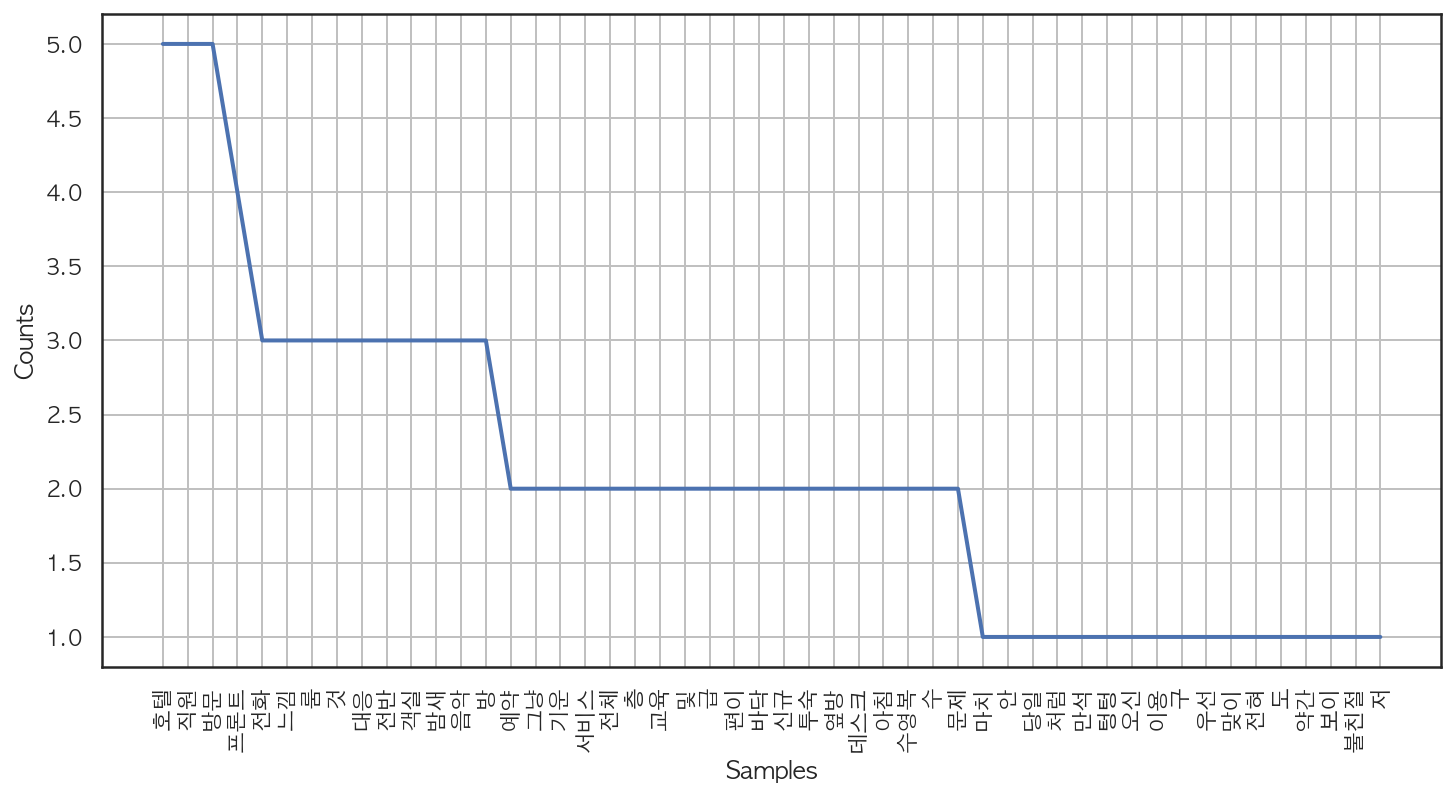

In [21]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

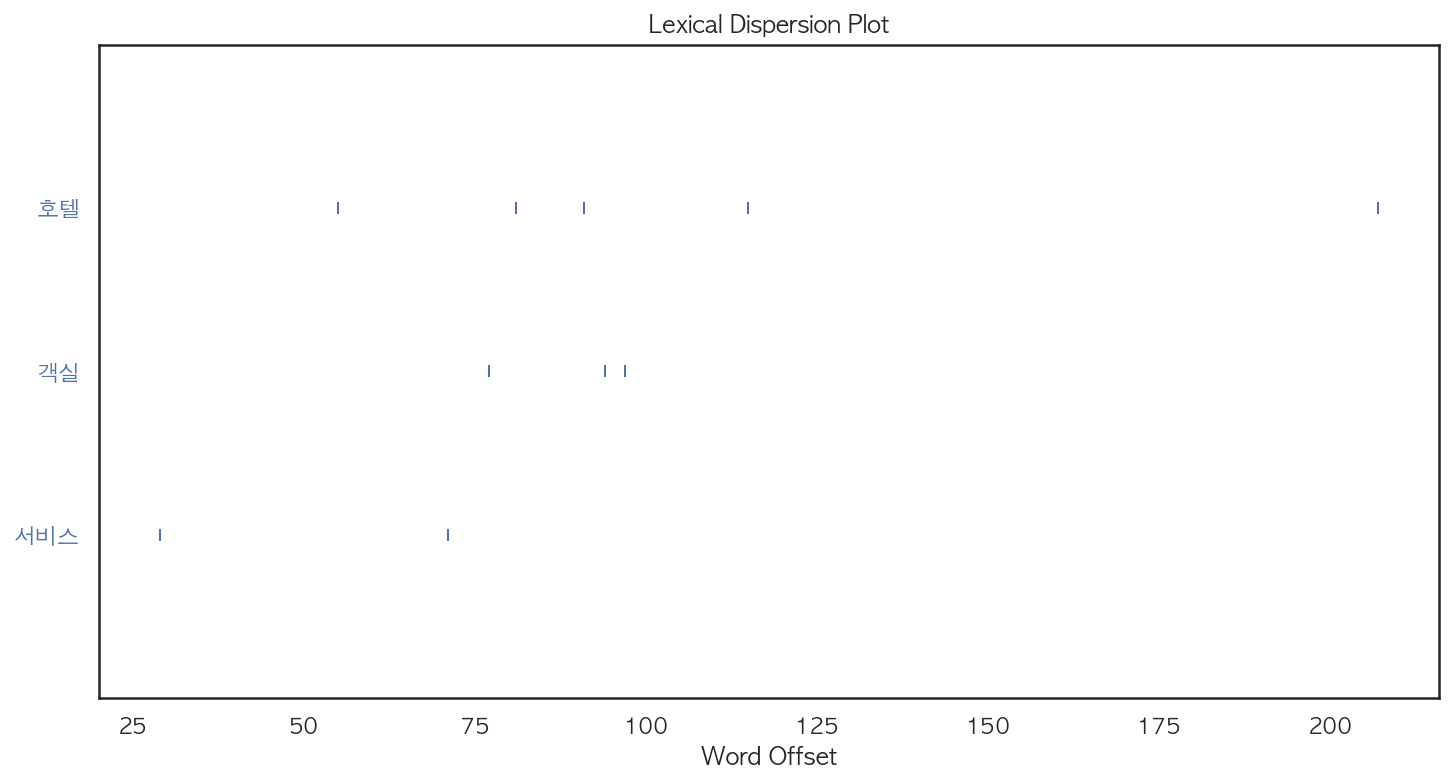

In [22]:
# 리뷰내의 특정 단어 위치 
plt.figure(figsize=(12,6))
ko.dispersion_plot(['호텔', '객실', '서비스'])

In [23]:
# wordcloud

In [25]:
# 윈도우 맥 환경에 맞게 글꼴 설정 
import platform
if platform.system() == 'Windows':   
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":  
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

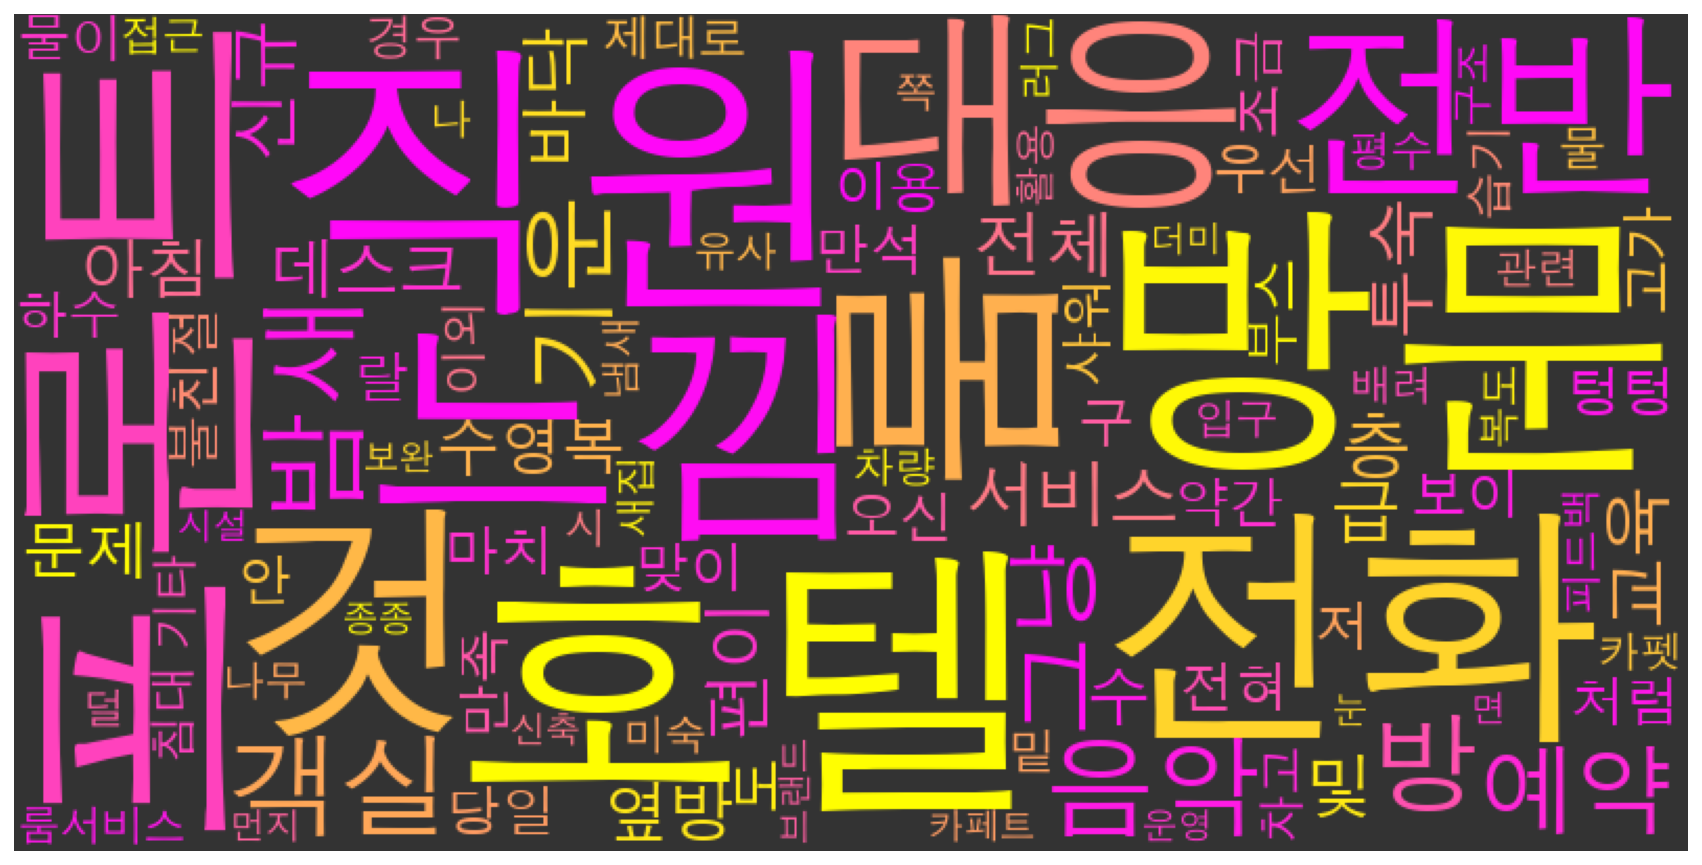

In [27]:
data = ko.vocab().most_common(212)

wordcloud = WordCloud(font_path=font_path,
                      colormap='spring',
                     background_color="#333333",
                     max_words=100,
                     relative_scaling=0.3,
                     width=800,
                     height=400).generate_from_frequencies(dict(data))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud )
plt.axis('off')
plt.show()

- 3점 이하이 평점을 분석해 본 결과 고객들은 호텔의 명성에 맞게 호캉스를 즐기려고 왔으나, 직원들의 응대 서비스가 마음에 들지 않았고, 호텔 룸이 전반적으로 습하다는 평이 있어 투숙하는 내내 불편했다 라는 리뷰가 있었다. 여기서 가장 마음에 들지 않은 부분은 바로 직원들의 응대 태도였다.